In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("fake_or_real_news.csv")


In [3]:
print(data.head())
print(data.info())


      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


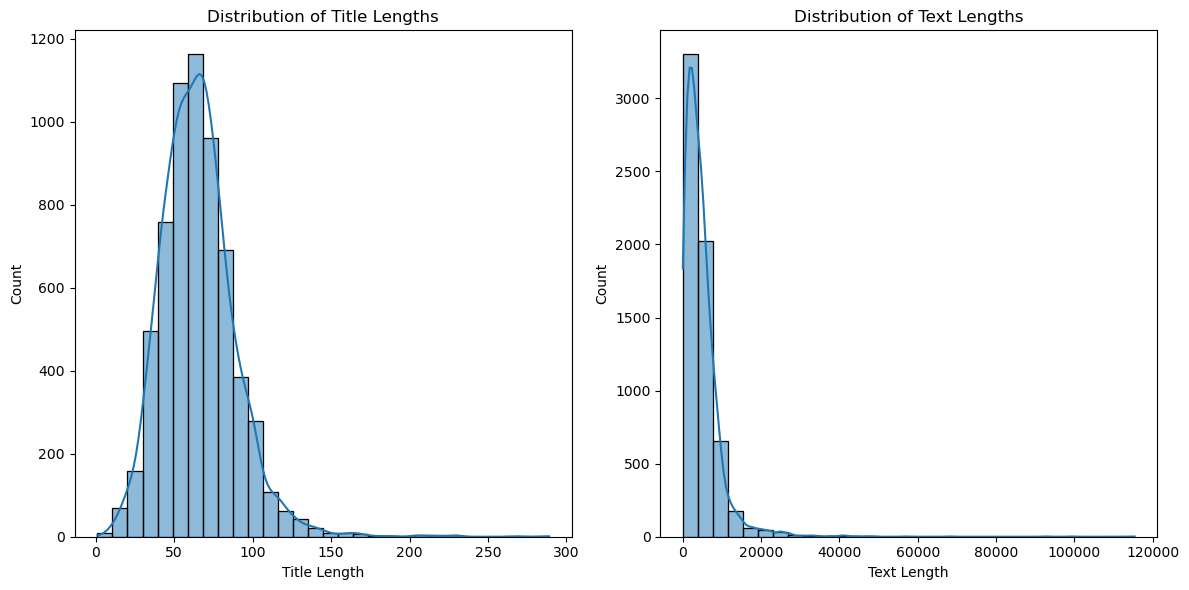

In [4]:
# Length of titles
data['title_length'] = data['title'].str.len()

# Length of texts
data['text_length'] = data['text'].str.len()

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['title_length'], kde=True, bins=30)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')

plt.subplot(1, 2, 2)
sns.histplot(data['text_length'], kde=True, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')

plt.tight_layout()
plt.show()


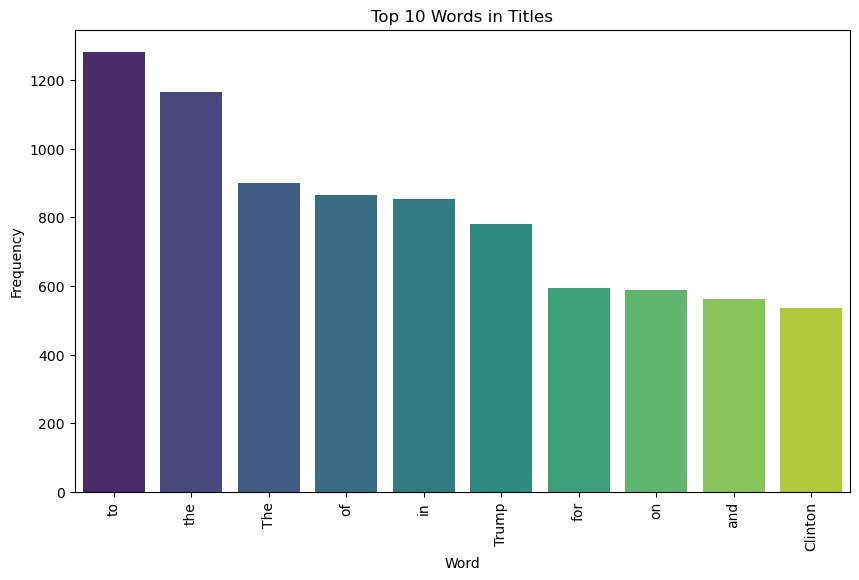

In [5]:
# Extracting top 10 words from titles
title_words = ' '.join(data['title']).split()
title_word_freq = pd.Series(title_words).value_counts()[:10]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=title_word_freq.index, y=title_word_freq.values, palette='viridis')
plt.title('Top 10 Words in Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Assuming 'subject' is a column in your dataset
subject_counts = data['subject'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Distribution of News by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='fake', y='text_length', data=data)
plt.title('Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


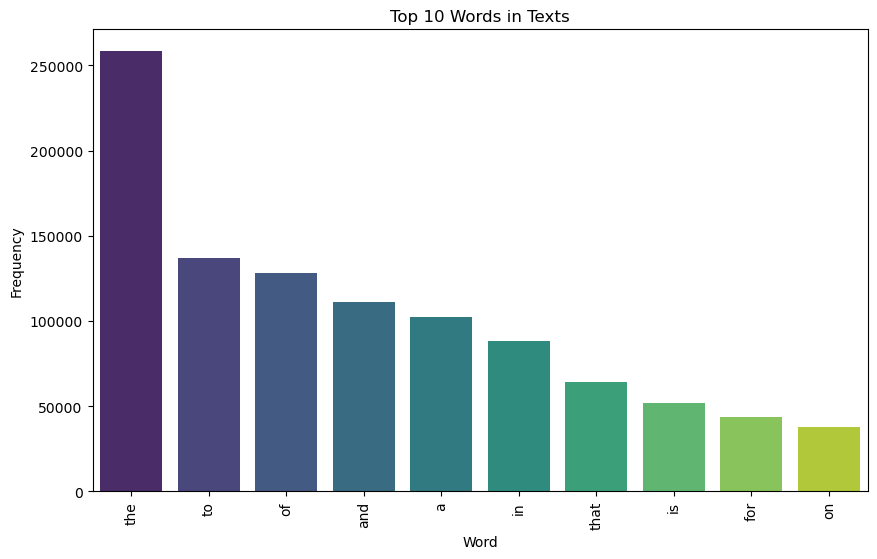

In [8]:
# Extracting top 10 words from texts
text_words = ' '.join(data['text']).split()
text_word_freq = pd.Series(text_words).value_counts()[:10]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=text_word_freq.index, y=text_word_freq.values, palette='viridis')
plt.title('Top 10 Words in Texts')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [10]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 825.8 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


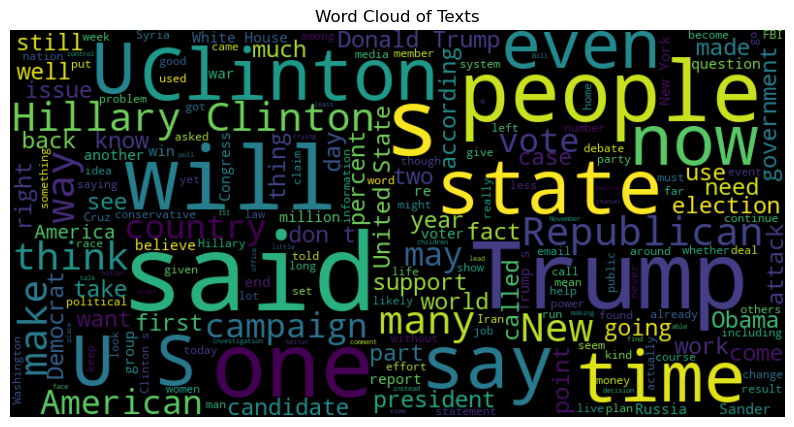

In [11]:
from wordcloud import WordCloud

# Joining all text data
all_text = ' '.join(data['text'])

# Generating word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Texts')
plt.show()
